In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
## Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv(r"c:\projects\mlproject\notebook\data\stud.csv")  # Update with the correct path


In [3]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
X=df.drop(columns=['math score'],axis=1)

In [5]:
X.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  reading score  writing score  
0                    none             72             74  
1               completed             90             88  
2                    none             95             93  
3                    none             57             44  
4                    none             78             75

In [8]:
print("Categories in 'gender' variable:      ",end="")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:      ",end="")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education:      ",end="")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:      ",end="")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:      ",end="")
print(df['test preparation course'].unique())



Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [6]:
y=df['math score']

In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [9]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns


from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
    ]

)



In [10]:
X=preprocessor.fit_transform(X)


In [11]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [13]:
X.shape

(1000, 19)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [19]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,mse,r2_square
    

In [20]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoosting Regressor':CatBoostRegressor(),
    'AdaBoost Regressor':AdaBoostRegressor(),

}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set')
    print('Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('mean Absolute error:{:.4f}'.format(model_train_mae))
    print('R2 score: {:.4f}'.format(model_train_r2))

    print('-----------------------')


    print('Model performance for test set')
    print('Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('mean Absolute error:{:.4f}'.format(model_test_mae))
    print('R2 score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


LinearRegression
Model performance for training set
Root Mean Squared Error: 28.4013
mean Absolute error:4.2715
R2 score: 0.8740
-----------------------
Model performance for test set
Root Mean Squared Error: 29.4326
mean Absolute error:4.2222
R2 score: 0.8790


Lasso
Model performance for training set
Root Mean Squared Error: 43.4784
mean Absolute error:5.2063
R2 score: 0.8071
-----------------------
Model performance for test set
Root Mean Squared Error: 42.5064
mean Absolute error:5.1579
R2 score: 0.8253


Ridge
Model performance for training set
Root Mean Squared Error: 28.3378
mean Absolute error:4.2650
R2 score: 0.8743
-----------------------
Model performance for test set
Root Mean Squared Error: 29.0563
mean Absolute error:4.2111
R2 score: 0.8806


K-Neighbors Regressor
Model performance for training set
Root Mean Squared Error: 32.5799
mean Absolute error:4.5168
R2 score: 0.8555
-----------------------
Model performance for test set
Root Mean Squared Error: 52.6066
mean Absolu

In [21]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

Model name  R2_Score
2                    Ridge  0.880593
0         LinearRegression  0.879046
8       AdaBoost Regressor  0.853615
5  Random Forest Regressor  0.851821
7    CatBoosting Regressor  0.851632
6             XGBRegressor  0.827797
1                    Lasso  0.825320
3    K-Neighbors Regressor  0.783813
4            Decision Tree  0.751190

In [23]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f' %score)

Accuracy of the model is 87.90


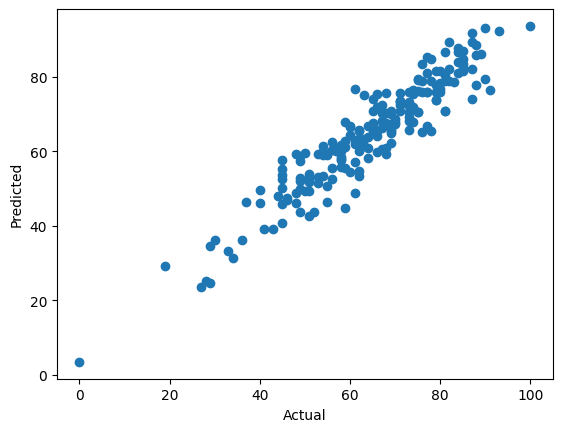

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [25]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

In [27]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Diffrence':y_test-y_pred})
pred_df

Actual Value  Predicted Value  Diffrence
521            91          76.4375    14.5625
737            53          59.3125    -6.3125
740            80          76.6250     3.3750
660            74          76.5625    -2.5625
411            84          87.7500    -3.7500
..            ...              ...        ...
408            52          43.6875     8.3125
332            62          62.3125    -0.3125
208            74          67.7500     6.2500
613            65          67.0000    -2.0000
78             61          62.6875    -1.6875

[200 rows x 3 columns]